## We're going to do a high level introduction to numpy.

#### This does not take the place of the material in the week's lesson videos. It is intended to supplement that material with some additional coverage and insights.

#### First, let's import the numpy library and check the version.

In [ ]:
import numpy as np
np.__version__

## Remember to use the built in documentation

#### For example, to display all the contents of the numpy namespace, you can type this:

In [1]: np.<TAB>
    
#### And to display NumPy's built-in documentation, you can use this:

In [2]: np?

In [ ]:
# np.sin()       
# <tab>
# np?

### This week's first video discusses the speed advantage that numpy arrays provide over the native Python data types. To understand this, let's take a look at each, "under the covers".

The below is adapted from "The Python Data Science Handbook", by Jake Vanderplas.

Python is a dynamically-typed language. What that means is that you do not have to explicitly declare the type of your variable (integer, string, etc) at the time you declare or populate it.

For example, in C you might specify a particular operation as follows:

```C
/* C code */
int result = 0;   # notice that the variable "result" is declared as an integer
for(int i=0; i<100; i++){
    result += i;
}
```

While in Python the equivalent operation could be written this way:

```python
# Python code
result = 0
for i in range(100):
    result += i
```

Notice the main difference: in C, the data types of each variable are explicitly declared, while in Python the types are dynamically inferred. This means, for example, that we can assign any kind of data to any variable:

```python
# Python code
x = 4
x = "four"
```

Here we've switched the contents of ``x`` from an integer to a string. The same thing in C would lead (depending on compiler settings) to a compilation error or other unintented consequences:

```C
/* C code */
int x = 4;
x = "four";  // FAILS
```

This sort of flexibility is one piece that makes Python and other dynamically-typed languages convenient and easy to use.

Understanding *how* this works is an important piece of learning to analyze data efficiently and effectively with Python.

### But what this type-flexibility also points to is the fact that Python variables are more than just their value; they also contain extra information about the type of the value. 

### Let's look at an integer data type in Python and C.

The standard Python implementation is written in C. So every function that you are calling in Python is actually running C code to implement.

This means that every Python object is simply a wrapper around a C structure, containing not only its value, but other information as well.

A single integer in Python actually contains four pieces, in the underlying C code:

- ``ob_refcnt``, a reference count that helps Python silently handle memory allocation and deallocation
- ``ob_type``, which encodes the type of the variable
- ``ob_size``, which specifies the size of the following data members
- ``ob_digit``, which contains the actual integer value that we expect the Python variable to represent.

This means that there is some overhead in storing an integer in Python as compared to an integer in a compiled language like C.

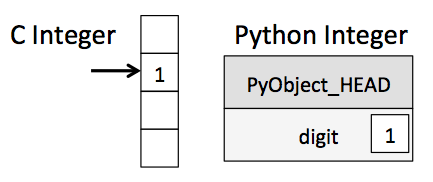

Here ``PyObject_HEAD`` is the part of the structure containing the reference count, type code, and other pieces mentioned before.

Notice the difference here: a C integer is essentially a label for a position in memory whose bytes encode an integer value.

A Python integer is a pointer to a position in memory containing all the Python object information, including the bytes that contain the integer value.
This extra information in the Python integer structure is what allows Python to be coded so freely and dynamically.

All this additional information in Python types comes at a cost, however, which becomes especially apparent in structures that combine many of these objects.

### Now let's understand what that means from a performance perspective.

Let's consider now what happens when we use a Python data structure that holds many Python objects.

A normal mutable multi-element container in Python is the list.

In [ ]:
# create a list of all of the same data types
my_list = list(range(10))
print(my_list)
print(type(my_list[0]))

In [ ]:
# Now let's create a heterogenous list
my_list_2 = [11, True, "19", 7.0]
[type(item) for item in my_list_2]

But this flexibility and coding efficiency comes at a cost: to allow these flexible types, each item in the list must contain its own type info, reference count, and other information–that is, each item is a complete Python object.

#### In the special case that all variables are of the same type, much of this information is redundant: it can be much more efficient to store data in a fixed-type array.

#### The difference between a dynamic-type list and a fixed-type (numPy-style) array is illustrated in the following figure:

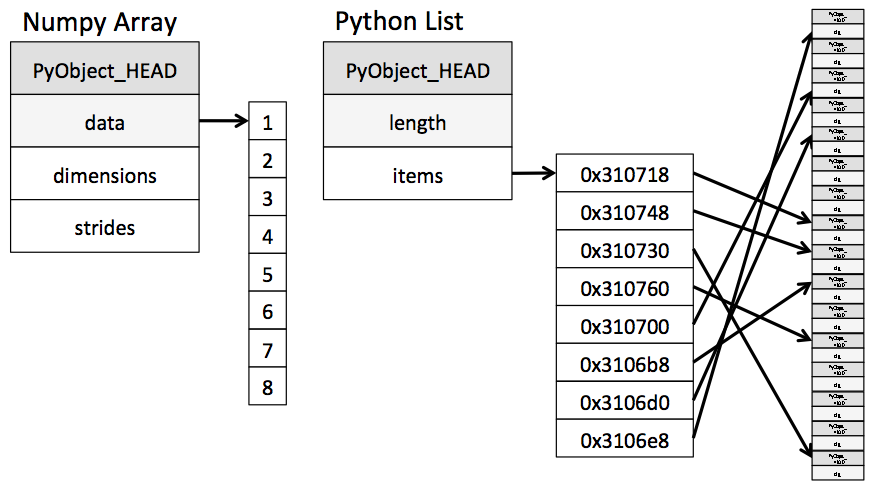

### So what happens when you do an operation on the two data structures is as follows (note that this is a simplification):

#### For the Python list:

a. For each element in the list:
    
    1. Read the header information
    
    2. Determine the underlying data type
    
    3. Call the appropriate operation for that data type
   
    4. Read the actual data
    
    5. Perform the operation and return the result
    
#### For the numpy array:

a. Read the header information

b. Determine the underlying data type

c. Call the appropriate operation for that data type

d. For each element in the list:
    
    1. Read the actual data
    
    2. Perform the operation and return the result
    
#### Note that for the Python data type, the program must do the full discovery process for each data element, while for the numpy array, it only does that once.

#### The implementation takeaway is that, if all of my data is of the same type, then it makes sense for better performance to use a numpy array, versus a native Python data type.

We are not going to demonstrate the speed differences, as you get a great example of that in **NB10, Part 0.**

Additionally, there is some excellent material in **NB10, Part 1** getting a little deeper into numpy functionality.

### Some useful numpy array attributes

In [ ]:
arr_1 = np.random.randint(10, size=68)  # One-dimensional array
arr_2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
arr_3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array, default int data type for OS

arr_4 = np.random.randint(10, size=(3, 4, 5),dtype=np.int64) # specify the data type

Each array has attributes ndim (the number of dimensions), shape (the size of each dimension), and size (the total size of the array).

We also have the attribute is the ``dtype``, the data type of the array.

In [ ]:
print("arr_3 ndim: ", arr_3.ndim)
print("arr_3 shape:", arr_3.shape)
print("arr_3 size: ", arr_3.size)
print("dtype:", arr_3.dtype)
print("dtype:", arr_4.dtype)

### Loops and Vector Operations

In a loop, we specifically tell Python to perform an operation on each data element. 

Note that we have emphasized loops in these Skills OH sessions. While we recognize that looping is much slower, we feel that explicitly writing out the loops (in the beginning) helps you to better understand the underlying programming logic.

In a vector operation, we tell Python to perform the same operation on the entire dataset at once. This is similar (but not identical) to the list and dictionary comprehensions that we learned about in Module 1.

The relative sluggishness of Python generally manifests itself in situations where many small operations are being repeated – for instance looping over arrays to operate on each element.

For example, imagine we have an array of values and we'd like to compute the reciprocal of each. A straightforward approach might look like this:

In [ ]:
np.random.seed(0)  #set the seed to reproduce the results

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output
        
values = np.random.randint(1, 10, size=5)
compute_reciprocals(values)

In [ ]:
big_array = np.random.randint(1, 100, size=100000)
%timeit compute_reciprocals(big_array)

#### Now let's do this as a vector operation:

Note that we only call the function once, and it performs the operation on every element of the numpy array, without the need to loop.

Those of you coming from a programming background in R should recognize what we are doing here.

In [ ]:
# to show that we get the same results
print(compute_reciprocals(values))
print(1.0 / values)

In [ ]:
big_array = np.random.randint(1, 100, size=100000)
%timeit (1.0 / big_array)

#### Bottom line, yes, it is faster, but we also do it in a single line of code. That is the essence of vector operations.

### The numpy user guide documentation online is a FANTASTIC reference, with many good reference pages, from beginner to advanced.

#### We cannot recommend this highly enough, for you all to take some time going through.

https://numpy.org/doc/stable/user/index.html

#### Additionally, the numpy API reference has a page for every function, containing the function definition and example code for how to use.

https://numpy.org/doc/stable/reference/index.html

### Finally, the numpy tutorials online have many useful walk throughs, including at least one that may be useful to you between now and the semester's end.

#### We cannot recommend this highly enough, for you all to take some time going through.

https://numpy.org/numpy-tutorials/index.html

https://numpy.org/numpy-tutorials/content/tutorial-svd.html  # might be useful


### Finally, another excellent and easy to follow online reference is the book that we noted above, "The Python Data Science Handbook" by Jake Vanderplas.

The book and all of its contents are posted online, and each chapter is done through a series of Jupyter notebooks that are available on Github and Google Colab.

#### Online version of the book on Github:  https://github.com/jakevdp/PythonDataScienceHandbook

You can download the code from Github as a zip file or work through the notebooks using Google Colab.

**Below are two links to the numpy chapter of the book, the first is the HTML, and the second in Colab. Highly recommended:**

https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html

https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/02.00-Introduction-to-NumPy.ipynb